In [1]:
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# License: BSD 3 clause

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

Automatically created module for IPython interactive environment


In [9]:
###############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [15]:
print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )

print( type(X_train.shape) )
print( type(y_train.shape) )
print( type(X_test.shape) )
print( type(y_test.shape) )

print( X_train[0:3] )

(455, 13)
(455,)
(51, 13)
(51,)
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
[[  1.50234003e+01   0.00000000e+00   1.81000004e+01   0.00000000e+00
    6.14000022e-01   5.30399990e+00   9.73000031e+01   2.10069990e+00
    2.40000000e+01   6.66000000e+02   2.02000008e+01   3.49480011e+02
    2.49099998e+01]
 [  5.44114017e+00   0.00000000e+00   1.81000004e+01   0.00000000e+00
    7.13000000e-01   6.65500021e+00   9.81999969e+01   2.35520005e+00
    2.40000000e+01   6.66000000e+02   2.02000008e+01   3.55290009e+02
    1.77299995e+01]
 [  1.00244999e+00   0.00000000e+00   8.14000034e+00   0.00000000e+00
    5.37999988e-01   6.67399979e+00   8.73000031e+01   4.23899984e+00
    4.00000000e+00   3.07000000e+02   2.10000000e+01   3.80230011e+02
    1.19799995e+01]]


In [3]:
###############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 6.5893


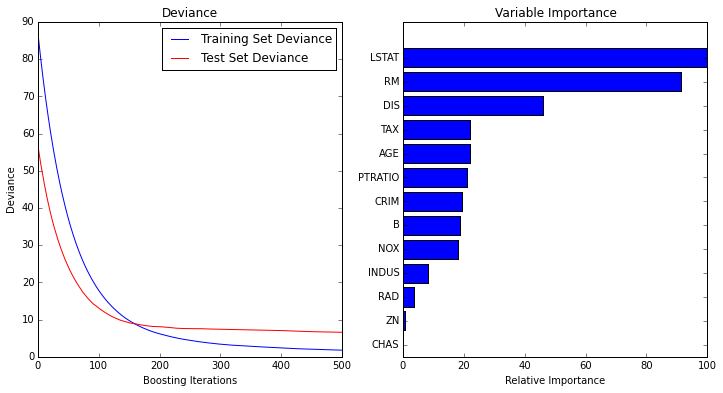

In [6]:
###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()